# Implementing the Popularity Based Recommender System and the Collaborative Filtering Recommender System

Authors: Wenyun Yuan and Haoyang Chen

In [1]:
import numpy as np  
import pandas as pd  
from sklearn.metrics.pairwise import cosine_similarity  
from IPython.display import Image
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict

# 1. Problem Understanding and Definition

## 1.1 Definition of the Problem statement and its Significance

This study implemented two recommendation system models: the Popularity Based Recommender System and the Collaborative Filtering Recommender System.

The Popularity Based Recommender System provides recommendations based on the popularity of items (such as books, movies, products, etc.). This type of recommendation system assumes that items that are most popular or most frequently purchased or rated will be liked by more people. It is typically used in scenarios where there is not much historical user preference data available or as a starting point when recommending to new users. The core idea of this recommendation system is that "the choice of the masses is not wrong," based on the popularity of items (such as the number of ratings and average ratings). It is simple, intuitive, easy to implement, and can quickly provide users with universally popular options.

Collaborative filtering is a widely used technique in recommendation systems. This technique predicts content that users may be interested in and recommends it to them by analyzing the similarity between users or items ("collaboration"). This method can provide more personalized recommendations because it considers users' personal preferences and historical behavior. In cases where there is a large user base and a significant amount of interaction data, collaborative filtering can effectively identify similarities between users, thus providing more accurate recommendations.

## 1.2 Identification of the Target Variable and Relevant Features

The target variable for the Popularity Based Recommender System is the popularity of books, represented by the number of ratings and the average rating.

Relevant features for the Popularity Based Recommender System:
- Number of ratings for books (num_ratings): This is a direct indicator of popularity, representing the number of ratings received by each book.
- Average rating for books (avg_rating): It reflects the average rating given by users to the books, indicating both the popularity of the books and user satisfaction.
- Book title (Book-Title): Although this is a categorical feature, it is a key feature for associating ratings with books in the recommendation system.

The target variable for the Collaborative Filtering Recommender System is the ratings that users give to books (aiming to predict these ratings).

Relevant features for the Collaborative Filtering Recommender System:
- User ID (User-ID): Used to identify different users and their rating behavior.
- Book ID or Book title (Book-Title): Used to identify the books being rated.

These features are used to build a user-item interaction matrix, which forms the basis of collaborative filtering algorithms. The purpose of the algorithm is to fill in missing values in this matrix, i.e., to predict the ratings that users might give to books they haven't interacted with.

## 1.3 Unsupervised Learning 
The above two models belong to unsupervised learning. This type of learning does not rely on labeled data but instead learns representations of the data by analyzing its structure and patterns within the dataset.

# 2.Data Collection and Preprocessing 

## 2.1 Data Sources and Data Collection Methods
The data sources is The Book-Crossing dataset consists of 3 files:

Users: Includes anonymized user IDs mapped to integers. Demographic data like Location and Age are provided if available, otherwise NULL-values.

Books: Identified by ISBN. Invalid ISBNs are already removed. Content-based info such as Book-Title, Book-Author, Year-Of-Publication, and Publisher is obtained from Amazon Web Services. For books with multiple authors, only the first is provided. URLs to cover images come in three sizes (small, medium, large), linking to Amazon's website.

Ratings: Contains book rating information. Ratings (Book-Rating) range from 1 to 10, with higher values indicating higher appreciation, or are implicit, represented by 0.

## 2.2 Data Preprocessing Steps
The following code processes the data step by step.

### Reading Data

In [2]:
# read 3 CSV files into 3 DataFrames
books = pd.read_csv('Books.csv',low_memory=False)
users = pd.read_csv('Users.csv')
ratings = pd.read_csv('Ratings.csv')

In [3]:
# display the first 5 rows of the books DataFrame
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
# return the value located in the 2nd row of the Image-URL-M column of the books DataFrame， to get the url for image and display it
image_url = books['Image-URL-M'][1]
print(image_url)
display(Image(url=image_url))

http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg


In [5]:
# display the first 5 rows of the DataFrame
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [6]:
# display the first 5 rows of the DataFrame
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [7]:
# Update the DataFrame to include only the rows where the 'Book-Rating' is greater than 0.
ratings = ratings[ratings['Book-Rating'] > 0]

In [8]:
# returns a tuple representing the dimensionality of the DataFrame
print(books.shape)
print(ratings.shape)
print(users.shape)

(271360, 8)
(433671, 3)
(278858, 3)


### Identifying and Summarizing Potential Quality Issues in Datasets
The purpose of the following code is to identify and summarize potential quality issues within the dataset, such as missing values and duplicates. This is an important step in preparing the data for further analysis.

In [9]:
# identify and sum up all missing values in each column of the books DataFrame
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [10]:
# identify and sum up all missing values in each column of the users DataFrame
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [11]:
# identify and sum up all missing values in each column of the ratings DataFrame
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

Overall, the quality of the dataset is acceptable.

### Merge Datasets

The following code will display the processed DataFrame num_rating, which contains the title of each book along with its corresponding number of ratings. This DataFrame can serve as the basis for creating a popularity-based recommendation system, where the most popular (i.e., highest number of ratings) books can be recommended to users. By merging the ratings and books DataFrames, you can associate detailed information about the books (such as title, author, etc.) with the corresponding user ratings. This step is necessary as it provides rich features for subsequent analysis and model building, including user ratings for books and other metadata about the books.

In [12]:
# performs a database-style join operation between two pandas DataFrames, ratings and books, using the merge function.
# the primary key is ISBN
# Merge the ratings and books DataFrames based on the common key ISBN, so that each rating is associated with detailed information about the corresponding book.
ratings_with_name = ratings.merge(books,on='ISBN')

In [13]:
ratings_with_name

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...
1,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...
2,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...
3,276744,038550120X,7,A Painted House,JOHN GRISHAM,2001,Doubleday,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...
4,11676,038550120X,10,A Painted House,JOHN GRISHAM,2001,Doubleday,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...
...,...,...,...,...,...,...,...,...,...,...
383837,276688,0425156737,2,Graven Images,Jane Waterhouse,1997,Berkley Publishing Group,http://images.amazon.com/images/P/0425156737.0...,http://images.amazon.com/images/P/0425156737.0...,http://images.amazon.com/images/P/0425156737.0...
383838,276688,0671563149,6,MUDDY WATER (Peter Bartholomew Mysteries),Sally Gunning,1997,Pocket,http://images.amazon.com/images/P/0671563149.0...,http://images.amazon.com/images/P/0671563149.0...,http://images.amazon.com/images/P/0671563149.0...
383839,276688,1575660792,7,Gray Matter,Shirley Kennett,1996,Kensington Publishing Corporation,http://images.amazon.com/images/P/1575660792.0...,http://images.amazon.com/images/P/1575660792.0...,http://images.amazon.com/images/P/1575660792.0...
383840,276704,0380796155,5,White Abacus,Damien Broderick,1998,Eos,http://images.amazon.com/images/P/0380796155.0...,http://images.amazon.com/images/P/0380796155.0...,http://images.amazon.com/images/P/0380796155.0...


In [14]:
# 1. Group the ratings_with_name DataFrame by the 'Book-Title' column
# This allows for aggregating ratings for each book
grouped_by_title = ratings_with_name.groupby('Book-Title')




In [15]:
print(grouped_by_title.size())

Book-Title
 A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)    1
 Ask Lily (Young Women of Faith: Lily Series, Book 5)                                                         1
 Dark Justice                                                                                                 1
 Earth Prayers From around the World: 365 Prayers, Poems, and Invocations for Honoring the Earth              7
 Final Fantasy Anthology: Official Strategy Guide (Brady Games)                                               2
                                                                                                             ..
Ã?Â?bernachten mit Stil. Die schÃ?Â¶nsten Country Inns und Bed und Breakfast der USA.                         1
Ã?Â?rger mit Produkt X. Roman.                                                                                3
Ã?Â?sterlich leben.                                                                          

In [16]:
# 2. Calculate the count of non-null (non-NA/null) values for each group, focusing on the 'Book-Rating' column
# This step aims to determine how many ratings each book has, which can be considered as a popularity indicator for each book
count_ratings = grouped_by_title.count()

# 3. Select the 'Book-Rating' column from the count results
book_rating_counts = count_ratings['Book-Rating']

# 4. Reset the index to turn 'Book-Title' from an index back into a regular column
# Use the book titles as a field instead of indexing the DataFrame with them
# After performing this operation, Book-Title is no longer the index but rather a column in the DataFrame, and the DataFrame automatically gets a new integer index starting from 0. This increases the flexibility of operations and makes the DataFrame easier to work with
num_rating = book_rating_counts.reset_index()

# 5. Rename the 'Book-Rating' column to 'num_ratings' to more clearly indicate it now represents the count of ratings
num_rating.rename(columns={'Book-Rating': 'num_ratings'}, inplace=True)

# Display the result
num_rating

,Book-Title,num_ratings
0,A Light in the Storm: The Civil War Diary of ...,1
1,"Ask Lily (Young Women of Faith: Lily Series, ...",1
2,Dark Justice,1
3,Earth Prayers From around the World: 365 Pray...,7
4,Final Fantasy Anthology: Official Strategy Gu...,2
...,...,...
135562,Ã?Â?bernachten mit Stil. Die schÃ?Â¶nsten Coun...,1
135563,Ã?Â?rger mit Produkt X. Roman.,3
135564,Ã?Â?sterlich leben.,1
135565,Ã?Â?stlich der Berge.,1


In [17]:
# The following code utilizes the Pandas library in Python to process the `ratings_with_name` DataFrame and create a table of average ratings grouped by book titles

In [18]:
# 1. Group the ratings_with_name DataFrame by the 'Book-Title'
grouped_by_title = ratings_with_name.groupby('Book-Title')

# 2. Calculate the average 'Book-Rating' for each group
mean_ratings = grouped_by_title['Book-Rating'].mean()

# 3. Convert the resulting Series to a DataFrame and reset the index
avg_rating = mean_ratings.reset_index()

# 4. Rename the column from 'Book-Rating' to 'avg_rating' to more clearly indicate it represents the average rating
avg_rating.rename(columns={'Book-Rating': 'avg_rating'}, inplace=True)

# Display the result
avg_rating

,Book-Title,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,9.000000
1,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
2,Dark Justice,10.000000
3,Earth Prayers From around the World: 365 Pray...,7.142857
4,Final Fantasy Anthology: Official Strategy Gu...,10.000000
...,...,...
135562,Ã?Â?bernachten mit Stil. Die schÃ?Â¶nsten Coun...,8.000000
135563,Ã?Â?rger mit Produkt X. Roman.,7.000000
135564,Ã?Â?sterlich leben.,7.000000
135565,Ã?Â?stlich der Berge.,8.000000


## 3. Popularity Based Recommender System

In [19]:
# 1. Merge the num_rating and avg_rating DataFrames using the merge function
# Specify 'on='Book-Title'' to indicate the column on which to base the merge
merged_data = num_rating.merge(avg_rating, on='Book-Title')

# 2. Assign the merged DataFrame to the variable 'popular'
popular = merged_data

# Display the merged result
popular

,Book-Title,num_ratings,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,1,9.000000
1,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
2,Dark Justice,1,10.000000
3,Earth Prayers From around the World: 365 Pray...,7,7.142857
4,Final Fantasy Anthology: Official Strategy Gu...,2,10.000000
...,...,...,...
135562,Ã?Â?bernachten mit Stil. Die schÃ?Â¶nsten Coun...,1,8.000000
135563,Ã?Â?rger mit Produkt X. Roman.,3,7.000000
135564,Ã?Â?sterlich leben.,1,7.000000
135565,Ã?Â?stlich der Berge.,1,8.000000


In [20]:
# 1. Filter the 'popular' DataFrame to include only books with at least 100 ratings
filtered_popular = popular[popular['num_ratings'] >= 100]

# 2. Sort the filtered DataFrame by 'avg_rating' in descending order to get the books with the highest average ratings at the top
sorted_popular = filtered_popular.sort_values('avg_rating', ascending=False)

# 3. Select the top 50 books after sorting by average rating
top_50_popular = sorted_popular.head(50)

# Reassign the final result back to the 'popular' variable
popular = top_50_popular


In [21]:
# Merge the 'popular' DataFrame with the 'books' DataFrame based on the common column 'Book-Title'
# Ensure both DataFrames contain the column 'Book-Title' and the columns you want to keep after the merge
merged_data = popular.merge(books, on='Book-Title', how='left')

# Remove duplicate entries based on 'Book-Title' to ensure each book is represented only once
# This is important to avoid having multiple rows for the same book in the final DataFrame
unique_data = merged_data.drop_duplicates('Book-Title')

# Before selecting specific columns, check if 'Book-Author' and 'Image-URL-M' exist in the 'unique_data' DataFrame
# If they don't exist, you might need to check the merge operation or the original 'books' DataFrame
columns_to_select = ['Book-Title', 'num_ratings', 'avg_rating']
if 'Book-Author' in unique_data.columns and 'Image-URL-M' in unique_data.columns:
    columns_to_select += ['Book-Author', 'Image-URL-M']

final_data = unique_data[columns_to_select]

# Reassign the processed DataFrame back to the 'popular' variable
# This DataFrame now contains the merged, deduplicated, and filtered results
popular = final_data

# Save the final DataFrame to a CSV file named 'Popularity_Based_Recommender_System_top_50_books_with_at_least_100_ratings.csv'
# This will store the top 50 popular books with detailed information in a CSV file for further use
popular.to_csv('Popularity_Based_Recommender_System_top_50_books_with_at_least_100_ratings.csv', index=False)

# Display the final DataFrame in the Jupyter notebook
# This allows you to visually inspect the top 50 popular books with their details
display(popular)


,Book-Title,num_ratings,avg_rating,Book-Author,Image-URL-M
0,"The Two Towers (The Lord of the Rings, Part 2)",136,9.330882,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339711.0...
11,"The Return of the King (The Lord of the Rings,...",103,9.213592,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339738.0...
21,Harry Potter and the Goblet of Fire (Book 4),247,9.125506,J. K. Rowling,http://images.amazon.com/images/P/0439139597.0...
23,Harry Potter and the Sorcerer's Stone (Book 1),176,9.062500,J. K. Rowling,http://images.amazon.com/images/P/0590353403.0...
27,Harry Potter and the Order of the Phoenix (Boo...,211,9.047393,J. K. Rowling,http://images.amazon.com/images/P/043935806X.0...
31,Harry Potter and the Prisoner of Azkaban (Book 3),277,9.043321,J. K. Rowling,http://images.amazon.com/images/P/0439136350.0...
34,To Kill a Mockingbird,267,8.977528,Harper Lee,http://images.amazon.com/images/P/0446310786.0...
42,Harry Potter and the Sorcerer's Stone (Harry P...,315,8.936508,J. K. Rowling,http://images.amazon.com/images/P/059035342X.0...
44,Ender's Game (Ender Wiggins Saga (Paperback)),151,8.920530,Orson Scott Card,http://images.amazon.com/images/P/0312853238.0...
48,The Fellowship of the Ring (The Lord of the Ri...,205,8.882927,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339703.0...


### Data Visualization

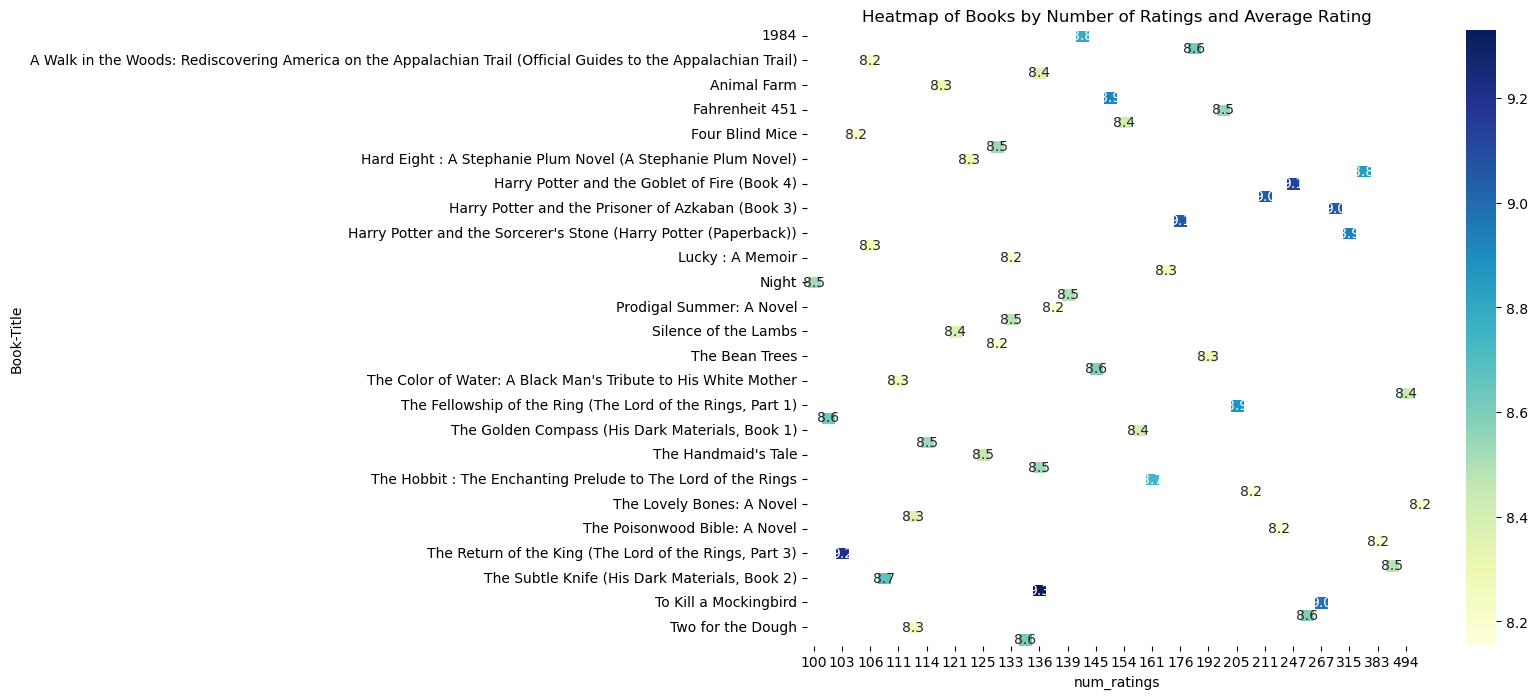

In [22]:
# Use pivot to transform the data format for easier heatmap visualization
heatmap_data = popular.pivot(index="Book-Title", columns="num_ratings", values="avg_rating")

# Plot the heatmap
plt.figure(figsize=(10, 8)) 
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=.5)
plt.title("Heatmap of Books by Number of Ratings and Average Rating")
plt.show()



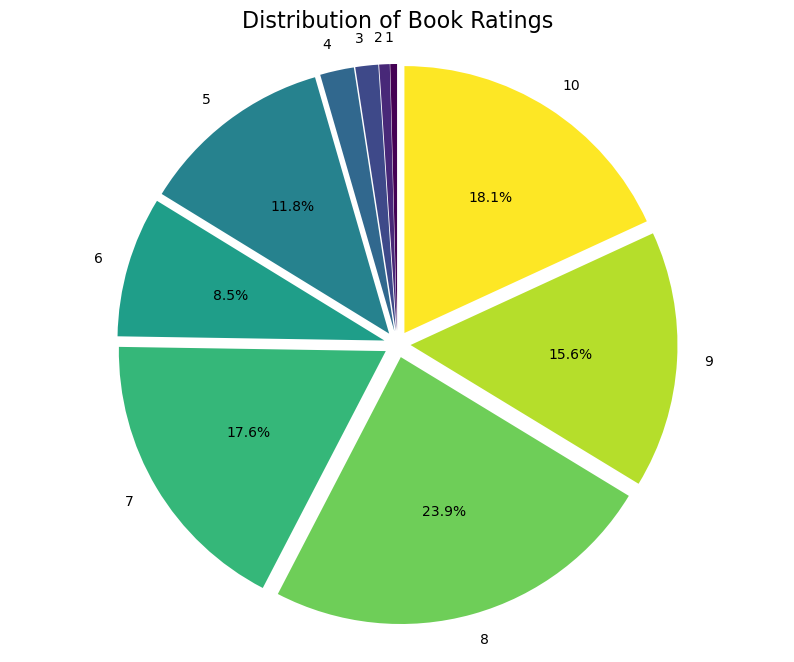

In [23]:
# Rating Distribution Pie Chart
# Count the occurrences of each rating
rating_counts = ratings['Book-Rating'].value_counts().sort_index()

plt.figure(figsize=(10, 8))
colors = plt.cm.viridis(np.linspace(0, 1, len(rating_counts)))  
explode = [0.05] * len(rating_counts)  
autopct = lambda p: f'{p:.1f}%' if p >= 4.4 else ''

plt.pie(rating_counts, labels=rating_counts.index, autopct=autopct, startangle=90, colors=colors, explode=explode)
plt.title('Distribution of Book Ratings', fontsize=16)
plt.axis('equal')  
plt.show()


Text(0, 0.5, 'Average Rating')

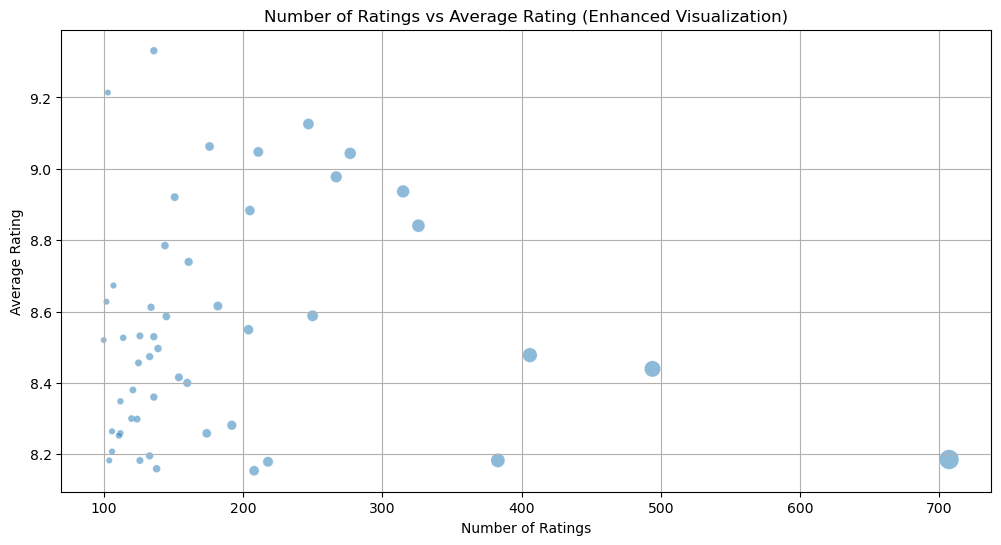

In [24]:
# # Scatter Plot of Number of Ratings vs. Average Rating: Create a scatter plot showing the relationship between the number of ratings and the average rating of books
plt.figure(figsize=(12, 6))

#Visualize the relationship between the number of ratings and the average rating using a scatter plot, and add transparency to reduce visual clutter from overlapping points. Additionally, use the size of the points to represent the number of ratings, where larger points indicate more ratings.
scatter = sns.scatterplot(
    data=popular, 
    x='num_ratings', 
    y='avg_rating', 
    size='num_ratings', 
    alpha=0.5, 
    sizes=(20, 200), 
    legend=False  
)
plt.grid(True)
plt.title('Number of Ratings vs Average Rating (Enhanced Visualization)')
plt.xlabel('Number of Ratings')
plt.ylabel('Average Rating')

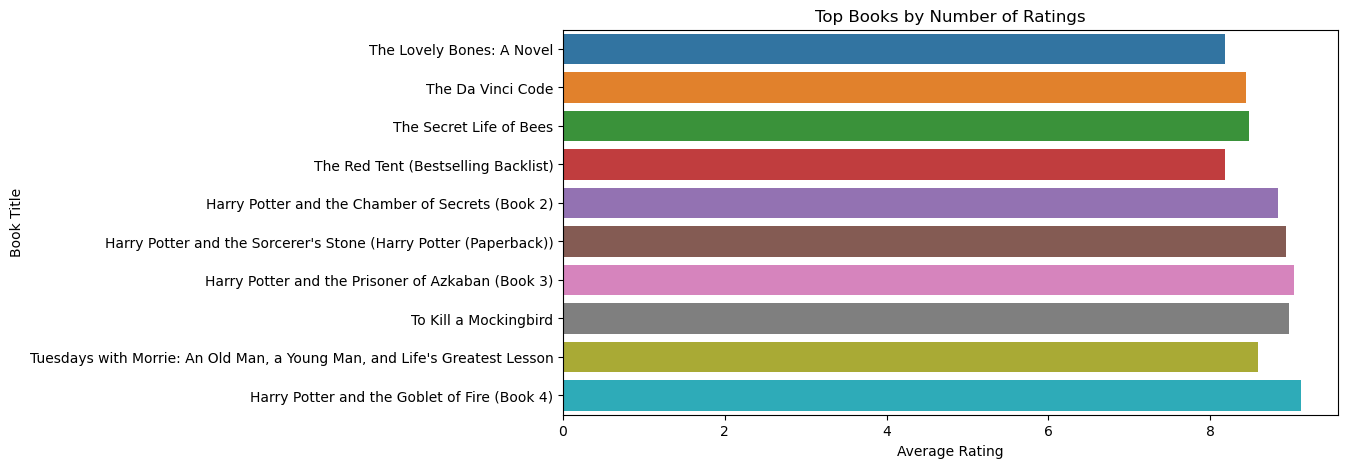

In [25]:
#Select the top-rated books with the highest number of ratings, and use a bar chart to display their average ratings
top_books = popular.sort_values('num_ratings', ascending=False).head(10)
plt.figure(figsize=(10, 5))
sns.barplot(data=top_books, x='avg_rating', y='Book-Title')
plt.title('Top Books by Number of Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Book Title')
plt.show()


# 4. Collaborative Filtering Recommender System

In [26]:
# read 3 CSV files into 3 DataFrames
books = pd.read_csv('Books.csv',low_memory=False)
users = pd.read_csv('Users.csv')
ratings = pd.read_csv('Ratings.csv')

In [27]:
# preprocessing
ratings_with_name = ratings.merge(books,on='ISBN')

In [28]:
# find out users who gave 20+ reviews and save their id in active_users
# 1: Group the 'ratings_with_name' DataFrame by 'User-ID' and count the number of 'Book-Rating' for each user
# This will result in a Series where the index is 'User-ID' and the value is the count of 'Book-Rating'
user_rating_counts = ratings_with_name.groupby('User-ID').count()['Book-Rating']

# 2: Create a boolean mask where each 'User-ID' is marked as True if their 'Book-Rating' count is greater than 200
# 'x' is a boolean Series where the index is 'User-ID' and the value is True or False based on the condition
x = user_rating_counts > 20

# : Filter the index of 'x' where the value is True
# 'active_users' is an index object containing 'User-ID' of users who have more than 200 'Book-Rating'
active_users = x[x].index


In [29]:
# Use the 'isin' method to filter the 'ratings_with_name' DataFrame
# Keep only the rows where the 'User-ID' column matches with the 'active_users' list
# This will create a new DataFrame containing ratings of only the active users
filtered_rating = ratings_with_name[ratings_with_name['User-ID'].isin(active_users)]

In [30]:
# creates a list of book titles (famous_books) that have received 20 or more ratings from the active users
# 1. Group the 'filtered_rating' DataFrame by 'Book-Title' and count the number of ratings for each book
# This will result in a Series where the index is 'Book-Title' and the value is the count of ratings for each book
book_rating_counts = filtered_rating.groupby('Book-Title').count()['Book-Rating']

# 2. Create a boolean mask where each 'Book-Title' is marked as True if it has 50 or more ratings
# 'y' is a boolean Series where the index is 'Book-Title' and the value is True or False based on the condition
y = book_rating_counts >= 20

# 3. Filter the index of 'y' where the value is True
# 'famous_books' is an index object containing 'Book-Title' of books that have 50 or more ratings
famous_books = y[y].index

In [31]:
# create a new DataFrame containing ratings of only the famous books
final_ratings = filtered_rating[filtered_rating['Book-Title'].isin(famous_books)]

In [32]:
# create a pivot table using the 'pivot_table' method of the 'final_ratings' DataFrame
# each row represents a book title, each column represents a user ID, and the values represent the ratings given by users for each book
pt = final_ratings.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')

In [33]:
pt

User-ID,242,243,254,383,388,408,446,487,503,507,...,278194,278202,278221,278356,278418,278535,278582,278633,278843,278851
Book-Title,,,,,,,,,,,,,,,,,,,,,
'Salem's Lot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10 Lb. Penalty,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1001 Ways to Be Romantic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101 Dalmatians,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
"14,000 Things to Be Happy About",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"\ Lamb to the Slaughter and Other Stories (Penguin 60s S.)""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
"\O\"" Is for Outlaw""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN
"\Surely You're Joking, Mr. Feynman!\"": Adventures of a Curious Character""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
pt.fillna(0,inplace=True)

In [35]:
pt

User-ID,242,243,254,383,388,408,446,487,503,507,...,278194,278202,278221,278356,278418,278535,278582,278633,278843,278851
Book-Title,,,,,,,,,,,,,,,,,,,,,
'Salem's Lot,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10 Lb. Penalty,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1001 Ways to Be Romantic,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101 Dalmatians,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"14,000 Things to Be Happy About",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"\ Lamb to the Slaughter and Other Stories (Penguin 60s S.)""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"\O\"" Is for Outlaw""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0
"\Surely You're Joking, Mr. Feynman!\"": Adventures of a Curious Character""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
# Calculate the cosine similarity scores between rows of the pivot table (pt). 
#In recommendation systems such as collaborative filtering, cosine similarity is often used to calculate the similarity between items (such as books, movies, etc.) to recommend similar items to users. items.
similarity_scores = cosine_similarity(pt)

In [37]:
def recommend(book_name):
    if book_name in pt.index:
        index = np.where(pt.index == book_name)[0][0]
        similar_items = sorted(list(enumerate(similarity_scores[index])), key=lambda x: x[1], reverse=True)[1:5]
        data = []
        for i in similar_items:
            item = []
            temp_df = books[books['Book-Title'] == pt.index[i[0]]]
            item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))
            item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Author'].values))
            item.extend(list(temp_df.drop_duplicates('Book-Title')['Image-URL-M'].values))
            data.append(item)
        return data
    else:
        return None



In [38]:
# return recommendations for the top 4 books that are most similar to the book titled 'Harry Potter and the Goblet of Fire (Book 4)', including their titles, authors, and image URLs.
recommend('Harry Potter and the Order of the Phoenix (Book 5)')

[['Harry Potter and the Goblet of Fire (Book 4)',
  'J. K. Rowling',
  'http://images.amazon.com/images/P/0439139597.01.MZZZZZZZ.jpg'],
 ['Harry Potter and the Prisoner of Azkaban (Book 3)',
  'J. K. Rowling',
  'http://images.amazon.com/images/P/0439136350.01.MZZZZZZZ.jpg'],
 ['Harry Potter and the Chamber of Secrets (Book 2)',
  'J. K. Rowling',
  'http://images.amazon.com/images/P/0439064872.01.MZZZZZZZ.jpg'],
 ["Harry Potter and the Sorcerer's Stone (Book 1)",
  'J. K. Rowling',
  'http://images.amazon.com/images/P/0590353403.01.MZZZZZZZ.jpg']]

In [39]:
# return recommendations for the top 4 books that are most similar to the book titled 'Harry Potter and the Goblet of Fire (Book 4)', including their titles, authors, and image URLs.
recommend('1984')

[['Animal Farm',
  'George Orwell',
  'http://images.amazon.com/images/P/0451526341.01.MZZZZZZZ.jpg'],
 ['Brave New World',
  'Aldous Huxley',
  'http://images.amazon.com/images/P/0060809833.01.MZZZZZZZ.jpg'],
 ['The Glass Menagerie',
  'Tennessee Williams',
  'http://images.amazon.com/images/P/0451166361.01.MZZZZZZZ.jpg'],
 ['Lying Awake',
  'Mark Salzman',
  'http://images.amazon.com/images/P/0375406328.01.MZZZZZZZ.jpg']]

In [40]:
# This code utilizes the Python pickle module, which is used to save an object (referred to as "popular" here) to a file for later use.
# Saving the object to a file allows for reloading the data when the program is run again, avoiding the need to recalculate or fetch the data each time the program runs.
import pickle
pickle.dump(popular,open('popular.pkl','wb'))

In [41]:
# remove duplicate rows in a DataFrame based on the 'Book-Title' column, retains the first occurrence, and returns a new DataFrame that does not contain duplicate 'Book-Title'
books.drop_duplicates('Book-Title')

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271354,0449906736,Flashpoints: Promise and Peril in a New World,Robin Wright,1993,Ballantine Books,http://images.amazon.com/images/P/0449906736.0...,http://images.amazon.com/images/P/0449906736.0...,http://images.amazon.com/images/P/0449906736.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [42]:
# save the objects pt, books, and similarity_scores as pickle files for future use
pickle.dump(pt,open('pt.pkl','wb'))
pickle.dump(books,open('books.pkl','wb'))
pickle.dump(similarity_scores,open('similarity_scores.pkl','wb'))

## Model performance of Collaborative Filtering Recommender System

In [43]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
train_data, test_data = train_test_split(ratings_with_name, test_size=0.2, random_state=42)

print(f"Training data size: {train_data.shape}")
print(f"Test data size: {test_data.shape}")



Training data size: (824908, 10)
Test data size: (206228, 10)


In [44]:
# Define a function to retrieve Top-N recommendations
def get_top_n(predictions, n=5):
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]
    return top_n



In [45]:
# Define a function to calculate the Top-N accuracy
def calculate_top_n_accuracy(top_n, test_data, threshold=4):
    hits = 0
    total = 0

    for uid, user_ratings in top_n.items():
        actual_ratings = test_data[test_data['User-ID'] == uid]
        actual_likes = actual_ratings[actual_ratings['Book-Rating'] >= threshold]['Book-Title'].tolist()
        
        predicted_likes = [iid for (iid, _) in user_ratings if iid in actual_likes]
        hits += len(predicted_likes)
        total += len(user_ratings)
        
    return hits / total if total != 0 else 0




In [46]:
# Define a function to calculate coverage
def calculate_coverage(top_n, all_books):
    recommended_books = set()
    for _, user_ratings in top_n.items():
        for iid, _ in user_ratings:
            recommended_books.add(iid)
    return len(recommended_books) / len(all_books)



In [ ]:
# generate recommendations for all book titles and store them in a dictionary
book_recommendations = {}
unique_books = test_data['Book-Title'].unique()
for book in unique_books:
    rec = recommend(book)
    if rec:
        book_recommendations[book] = rec[0][0]  

# Generate predictions using the recommendation dictionary
predictions = [
    (user_id, row['Book-Title'], row['Book-Rating'], book_recommendations.get(row['Book-Title'], 0), None)
    for user_id, row in test_data.iterrows()
    if row['Book-Title'] in book_recommendations
]



In [ ]:
# Retrieve Top-N recommendations
top_n = get_top_n(predictions, n=5)
top_n_accuracy = calculate_top_n_accuracy(top_n, test_data)
coverage = calculate_coverage(top_n, set(ratings_with_name['Book-Title'].unique()))

print(f"Top-N Accuracy: {top_n_accuracy}")
print(f"Coverage: {coverage}")



The performance metrics for the model indicate:

Top-N Accuracy: This is extremely low at approximately 0.000012536, almost zero. It suggests that the model is almost never accurate when recommending the top N items.
Coverage: The value of 0.02378, or roughly 2.38%, indicates the model's ability to recommend a diverse set of items. In this case, the model covers about 2.38% of the total possible recommendations, which suggests that it has a very low diversity in its recommendations.

Possible issues:

If most books have very few ratings, inferring user preferences from their behavior will be very difficult. This directly affects recommendation accuracy.

Insufficient model complexity: Relying solely on basic similarity metrics (such as cosine similarity) may not be enough to capture complex user preferences. More advanced models such as matrix factorization, deep learning, or model-based collaborative filtering may provide better results.

Lack of diversity: The recommendation system tends to recommend only a few highly popular books, which may lower the system's coverage.

# 5. Bonus Points: GUI

In [ ]:
# GUI
import tkinter as tk
from PIL import Image, ImageTk
import requests
from io import BytesIO

def recommend_gui(book_name):
    """
    Function to generate recommendations for a given book name.

    Args:
        book_name (str): The name of the book for which recommendations are to be generated.

    Returns:
        list: A list containing information about recommended books, including title, author, and image URL.
              Each element in the list is a sublist containing [title, author, image_url] for a recommended book.
              Returns an empty list if the book name is not found in the index.
    """
    if book_name in pt.index:
        # Find the index of the given book name in the index
        index = np.where(pt.index == book_name)[0][0]
         # Find similar items based on similarity scores
        similar_items = sorted(list(enumerate(similarity_scores[index])), key=lambda x: x[1], reverse=True)[1:5]
        data = []
        # Iterate through similar items and retrieve information
        for i in similar_items:
            item = []
            temp_df = books[books['Book-Title'] == pt.index[i[0]]]
            item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))
            item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Author'].values))
            item.extend(list(temp_df.drop_duplicates('Book-Title')['Image-URL-M'].values))
            data.append(item)
        return data
    else:
        return []




In [ ]:
def show_recommendations():
    book_name = entry.get()
    recommendations = recommend_gui(book_name) 
    for widget in frame.winfo_children():
        widget.destroy()
    for book in recommendations:
        if book:
            subframe = tk.Frame(frame)
            subframe.pack(fill='x', expand=True, padx=10, pady=5)
            title, author, _ = book  
            book_info = f"Title: {title}\nAuthor: {author}"
            tk.Label(subframe, text=book_info, justify='left').pack(side='left')


In [ ]:
# Setup the main GUI window
root = tk.Tk()
root.title('Book Recommender System')

In [ ]:
# Improve layout by using grid instead of pack for better alignment
tk.Label(root, text="Enter a book title:").grid(row=0, column=0, padx=10, pady=10)
entry = tk.Entry(root, width=50)
entry.grid(row=0, column=1, padx=10, pady=10)

tk.Button(root, text="Get Recommendations", command=show_recommendations).grid(row=1, column=0, columnspan=2, pady=10)

frame = tk.Frame(root)
frame.grid(row=2, column=0, columnspan=2, sticky='nsew')

# Configure the grid layout to give the frame widget more space
root.grid_rowconfigure(2, weight=1)
root.grid_columnconfigure(1, weight=1)

root.mainloop()

In [ ]:
from IPython.display import display, Image
display(Image(filename='GUI.png'))